In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv("ps6_trainvalid.csv")
test_df = pd.read_csv("ps6_test.csv")

df = df.drop([0])

In [3]:
test_df

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2017-11-20 01:00:00,295.72,26.0,1014.0,sky is clear,270.0,2.0
1,2017-11-20 02:00:00,292.97,30.0,1014.0,light rain,260.0,2.0
2,2017-11-20 03:00:00,290.71,25.0,1016.0,sky is clear,270.0,1.0
3,2017-11-20 04:00:00,290.09,72.0,1016.0,sky is clear,356.0,0.0
4,2017-11-20 05:00:00,289.03,44.0,1016.0,sky is clear,27.0,1.0
...,...,...,...,...,...,...,...
235,2017-11-29 20:00:00,293.55,24.0,1016.0,sky is clear,19.0,1.0
236,2017-11-29 21:00:00,295.68,21.0,1016.0,sky is clear,19.0,1.0
237,2017-11-29 22:00:00,295.96,23.0,1015.0,sky is clear,19.0,1.0
238,2017-11-29 23:00:00,295.65,14.0,1016.0,sky is clear,200.0,2.0


In [4]:
df

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
1,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
5,2012-10-01 17:00:00,291.852162,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45008,2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
45009,2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
45010,2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0
45011,2017-11-19 23:00:00,297.090000,17.0,1014.0,sky is clear,324.0,0.0


In [5]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

                  datetime  temperature  humidity  pressure           weather  \
91     2012-10-05 07:00:00      290.005      81.0       NaN  scattered clouds   
92     2012-10-05 08:00:00      288.970      81.0       NaN      sky is clear   
93     2012-10-05 09:00:00      289.275      81.0       NaN     broken clouds   
138    2012-10-07 06:00:00      290.980      88.0       NaN      sky is clear   
139    2012-10-07 07:00:00      290.360      94.0       NaN      sky is clear   
...                    ...          ...       ...       ...               ...   
32579  2016-06-19 23:00:00      312.900       NaN    1013.0      sky is clear   
32580  2016-06-20 00:00:00      312.190       NaN    1013.0      sky is clear   
32581  2016-06-20 01:00:00      310.290       NaN    1013.0      sky is clear   
44026  2017-10-09 22:00:00      301.020       NaN    1013.0              dust   
44360  2017-10-23 20:00:00      309.280       NaN    1019.0      sky is clear   

       wind_direction  wind

In [6]:
df.isna().sum()

datetime            0
temperature         2
humidity          151
pressure          251
weather             0
wind_direction      0
wind_speed          0
dtype: int64

In [7]:
df['humidity'] = df['humidity'].interpolate(method='linear')
df['temperature'] = df['temperature'].interpolate(method='linear')
df['pressure'] = df['pressure'].interpolate(method='linear')

In [8]:
df

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
1,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
5,2012-10-01 17:00:00,291.852162,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45008,2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
45009,2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
45010,2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0
45011,2017-11-19 23:00:00,297.090000,17.0,1014.0,sky is clear,324.0,0.0


In [9]:
df.isna().sum()

datetime          0
temperature       0
humidity          0
pressure          0
weather           0
wind_direction    0
wind_speed        0
dtype: int64

In [10]:
df.loc[(df.weather == 'sky is clear'),'weather']='Clear'

df.loc[(df.weather == 'haze'),'weather']='Fog'
df.loc[(df.weather == 'mist'),'weather']='Fog'
df.loc[(df.weather == 'fog'),'weather']='Fog'

df.loc[(df.weather == 'broken clouds'),'weather']='Clouds'
df.loc[(df.weather == 'overcast clouds'),'weather']='Clouds'
df.loc[(df.weather == 'scattered clouds'),'weather']='Clouds'
df.loc[(df.weather == 'few clouds'),'weather']='Clouds'

df.loc[(df.weather == 'smoke'),'weather']='Smoke/Dust'
df.loc[(df.weather == 'dust'),'weather']='Smoke/Dust'

df.loc[(df.weather == 'light rain'),'weather']='Rain'
df.loc[(df.weather == 'moderate rain'),'weather']='Rain'
df.loc[(df.weather == 'heavy intensity rain'),'weather']='Rain'
df.loc[(df.weather == 'light intensity drizzle'),'weather']='Rain'
df.loc[(df.weather == 'very heavy rain'),'weather']='Rain'
df.loc[(df.weather == 'shower rain'),'weather']='Rain'
df.loc[(df.weather == 'drizzle'),'weather']='Rain'
df.loc[(df.weather == 'proximity shower rain'),'weather']='Rain'
df.loc[(df.weather == 'light intensity shower rain'),'weather']='Rain'
df.loc[(df.weather == 'squalls'),'weather']='Rain'

df.loc[(df.weather == 'proximity thunderstorm'),'weather']='Thunderstorms'
df.loc[(df.weather == 'thunderstorm'),'weather']='Thunderstorms'
df.loc[(df.weather == 'thunderstorm with light rain'),'weather']='Thunderstorms'
df.loc[(df.weather == 'thunderstorm with rain'),'weather']='Thunderstorms'
df.loc[(df.weather == 'thunderstorm with heavy rain'),'weather']='Thunderstorms'

In [11]:
test_df.loc[(test_df.weather == 'sky is clear'),'weather']='Clear'

test_df.loc[(test_df.weather == 'haze'),'weather']='Fog'
test_df.loc[(test_df.weather == 'mist'),'weather']='Fog'
test_df.loc[(test_df.weather == 'fog'),'weather']='Fog'

test_df.loc[(test_df.weather == 'broken clouds'),'weather']='Clouds'
test_df.loc[(test_df.weather == 'overcast clouds'),'weather']='Clouds'
test_df.loc[(test_df.weather == 'scattered clouds'),'weather']='Clouds'
test_df.loc[(test_df.weather == 'few clouds'),'weather']='Clouds'

test_df.loc[(test_df.weather == 'smoke'),'weather']='Smoke/Dust'
test_df.loc[(test_df.weather == 'dust'),'weather']='Smoke/Dust'

test_df.loc[(test_df.weather == 'light rain'),'weather']='Rain'
test_df.loc[(test_df.weather == 'moderate rain'),'weather']='Rain'
test_df.loc[(test_df.weather == 'heavy intensity rain'),'weather']='Rain'
test_df.loc[(test_df.weather == 'light intensity drizzle'),'weather']='Rain'
test_df.loc[(test_df.weather == 'very heavy rain'),'weather']='Rain'
test_df.loc[(test_df.weather == 'shower rain'),'weather']='Rain'
test_df.loc[(test_df.weather == 'drizzle'),'weather']='Rain'
test_df.loc[(test_df.weather == 'proximity shower rain'),'weather']='Rain'
test_df.loc[(test_df.weather == 'light intensity shower rain'),'weather']='Rain'
test_df.loc[(test_df.weather == 'squalls'),'weather']='Rain'

test_df.loc[(test_df.weather == 'proximity thunderstorm'),'weather']='Thunderstorms'
test_df.loc[(test_df.weather == 'thunderstorm'),'weather']='Thunderstorms'
test_df.loc[(test_df.weather == 'thunderstorm with light rain'),'weather']='Thunderstorms'
test_df.loc[(test_df.weather == 'thunderstorm with rain'),'weather']='Thunderstorms'
test_df.loc[(test_df.weather == 'thunderstorm with heavy rain'),'weather']='Thunderstorms'

In [12]:
df.weather.value_counts()

Clear            25983
Clouds            9016
Fog               6988
Rain              2699
Smoke/Dust         267
Thunderstorms       59
Name: weather, dtype: int64

In [13]:
test_df.weather.value_counts()

Clear         153
Fog            71
Clouds          9
Rain            5
Smoke/Dust      2
Name: weather, dtype: int64

In [14]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['weather'], prefix='weather')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['weather'],axis=1, inplace=True)

In [15]:
# use pd.concat to join the new columns with your original dataframe
test_df = pd.concat([test_df,pd.get_dummies(test_df['weather'], prefix='weather')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
test_df.drop(['weather'],axis=1, inplace=True)

In [16]:
date_time = pd.to_datetime(df.pop('datetime'))
date_time

1       2012-10-01 13:00:00
2       2012-10-01 14:00:00
3       2012-10-01 15:00:00
4       2012-10-01 16:00:00
5       2012-10-01 17:00:00
                ...        
45008   2017-11-19 20:00:00
45009   2017-11-19 21:00:00
45010   2017-11-19 22:00:00
45011   2017-11-19 23:00:00
45012   2017-11-20 00:00:00
Name: datetime, Length: 45012, dtype: datetime64[ns]

In [17]:
date_time_test = pd.to_datetime(test_df.pop('datetime'))
date_time_test

0     2017-11-20 01:00:00
1     2017-11-20 02:00:00
2     2017-11-20 03:00:00
3     2017-11-20 04:00:00
4     2017-11-20 05:00:00
              ...        
235   2017-11-29 20:00:00
236   2017-11-29 21:00:00
237   2017-11-29 22:00:00
238   2017-11-29 23:00:00
239   2017-11-30 00:00:00
Name: datetime, Length: 240, dtype: datetime64[ns]

In [18]:
df

,temperature,humidity,pressure,wind_direction,wind_speed,weather_Clear,weather_Clouds,weather_Fog,weather_Rain,weather_Smoke/Dust,weather_Thunderstorms
1,291.870000,88.0,1013.0,0.0,0.0,0,0,1,0,0,0
2,291.868186,88.0,1013.0,0.0,0.0,1,0,0,0,0,0
3,291.862844,88.0,1013.0,0.0,0.0,1,0,0,0,0,0
4,291.857503,88.0,1013.0,0.0,0.0,1,0,0,0,0,0
5,291.852162,88.0,1013.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45008,295.440000,17.0,1017.0,345.0,1.0,1,0,0,0,0,0
45009,296.020000,16.0,1016.0,345.0,1.0,1,0,0,0,0,0
45010,296.510000,17.0,1015.0,345.0,1.0,1,0,0,0,0,0
45011,297.090000,17.0,1014.0,324.0,0.0,1,0,0,0,0,0


In [19]:
test_df['weather_Thunderstorms'] = 0

In [20]:
test_df

,temperature,humidity,pressure,wind_direction,wind_speed,weather_Clear,weather_Clouds,weather_Fog,weather_Rain,weather_Smoke/Dust,weather_Thunderstorms
0,295.72,26.0,1014.0,270.0,2.0,1,0,0,0,0,0
1,292.97,30.0,1014.0,260.0,2.0,0,0,0,1,0,0
2,290.71,25.0,1016.0,270.0,1.0,1,0,0,0,0,0
3,290.09,72.0,1016.0,356.0,0.0,1,0,0,0,0,0
4,289.03,44.0,1016.0,27.0,1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
235,293.55,24.0,1016.0,19.0,1.0,1,0,0,0,0,0
236,295.68,21.0,1016.0,19.0,1.0,1,0,0,0,0,0
237,295.96,23.0,1015.0,19.0,1.0,1,0,0,0,0,0
238,295.65,14.0,1016.0,200.0,2.0,1,0,0,0,0,0


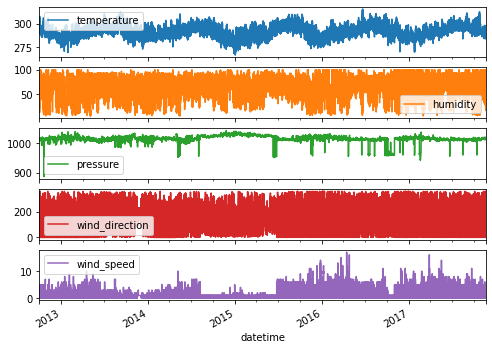

In [21]:
plot_cols = ['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

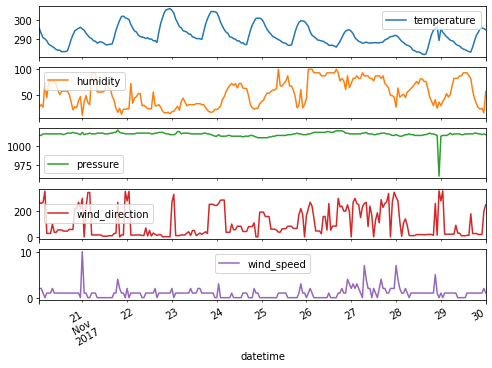

In [22]:
plot_cols = ['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed']
plot_features = test_df[plot_cols]
plot_features.index = date_time_test
_ = plot_features.plot(subplots=True)

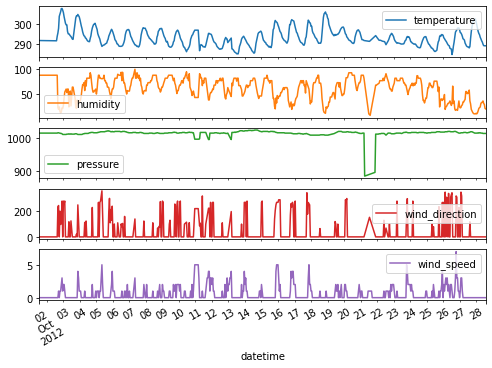

In [23]:
plot_features = df[plot_cols][:650]
plot_features.index = date_time[:650]
_ = plot_features.plot(subplots=True)

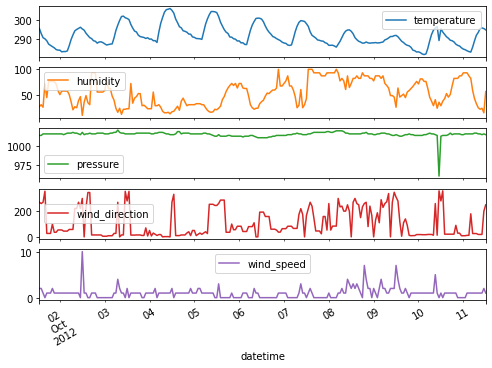

In [24]:
plot_features = test_df[plot_cols][:240]
plot_features.index = date_time[:240]
_ = plot_features.plot(subplots=True)

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,45012.0,290.841207,6.465209,266.503667,286.37,290.53,295.08,315.47
humidity,45012.0,62.733504,21.840257,5.000000,48.00,66.00,81.00,100.00
pressure,45012.0,1015.875211,11.500143,886.000000,1013.00,1016.00,1021.00,1044.00
wind_direction,45012.0,139.733804,105.545576,0.000000,29.00,140.00,230.00,360.00
wind_speed,45012.0,1.220652,1.435687,0.000000,0.00,1.00,2.00,17.00
weather_Clear,45012.0,0.577246,0.494002,0.000000,0.00,1.00,1.00,1.00
weather_Clouds,45012.0,0.200302,0.400231,0.000000,0.00,0.00,0.00,1.00
weather_Fog,45012.0,0.155247,0.362144,0.000000,0.00,0.00,0.00,1.00
weather_Rain,45012.0,0.059962,0.237419,0.000000,0.00,0.00,0.00,1.00
weather_Smoke/Dust,45012.0,0.005932,0.076790,0.000000,0.00,0.00,0.00,1.00


In [26]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,240.0,291.702988,5.535212,281.6,287.9075,290.57,294.9325,306.47
humidity,240.0,53.441667,25.430781,9.0,30.0000,54.00,76.0000,100.00
pressure,240.0,1015.466667,3.963079,961.0,1015.0000,1016.00,1017.0000,1021.00
wind_direction,240.0,105.004167,108.706064,0.0,17.0000,53.00,200.2500,359.00
wind_speed,240.0,1.012500,1.187386,0.0,0.0000,1.00,1.0000,10.00
weather_Clear,240.0,0.637500,0.481727,0.0,0.0000,1.00,1.0000,1.00
weather_Clouds,240.0,0.037500,0.190381,0.0,0.0000,0.00,0.0000,1.00
weather_Fog,240.0,0.295833,0.457370,0.0,0.0000,0.00,1.0000,1.00
weather_Rain,240.0,0.020833,0.143125,0.0,0.0000,0.00,0.0000,1.00
weather_Smoke/Dust,240.0,0.008333,0.091096,0.0,0.0000,0.00,0.0000,1.00


Text(0, 0.5, 'Wind Velocity [m/s]')

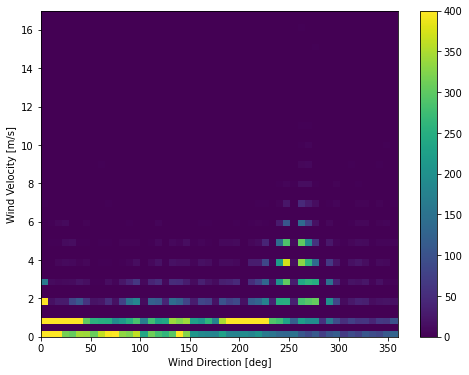

In [27]:
plt.hist2d(df['wind_direction'], df['wind_speed'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

Text(0, 0.5, 'Wind Velocity [m/s]')

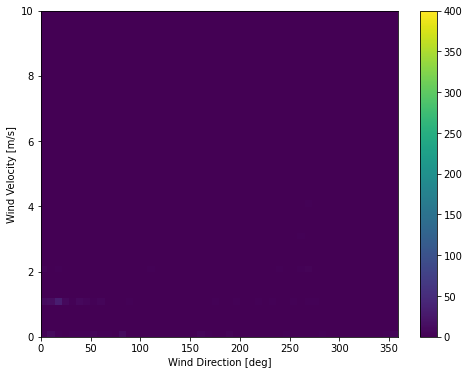

In [28]:
plt.hist2d(test_df['wind_direction'], test_df['wind_speed'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [29]:
wv = df.pop('wind_speed')

# Convert to radians.
wd_rad = df.pop('wind_direction')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

In [30]:
wv_test = test_df.pop('wind_speed')

# Convert to radians.
wd_rad_test = test_df.pop('wind_direction')*np.pi / 180

# Calculate the wind x and y components.
test_df['Wx'] = wv_test*np.cos(wd_rad_test)
test_df['Wy'] = wv_test*np.sin(wd_rad_test)

(-11.0, 13.0, -15.974774553360445, 10.724622203665692)

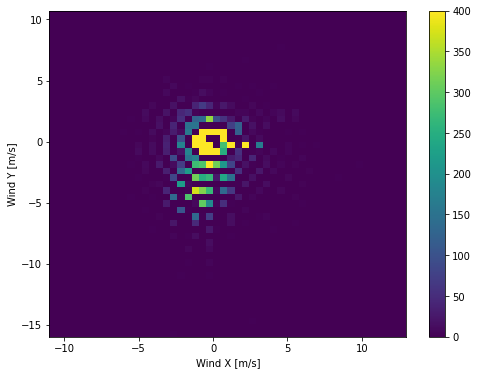

In [31]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

(-2.8190778623577253, 5.0, -8.660254037844386, 1.969615506024416)

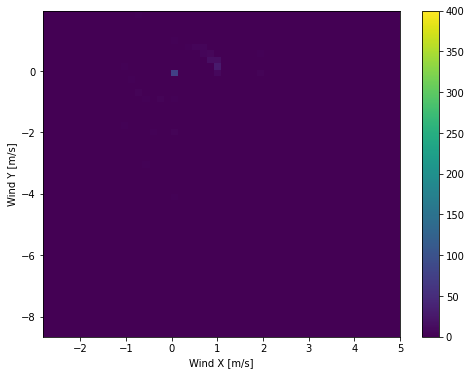

In [32]:
plt.hist2d(test_df['Wx'], test_df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [33]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [34]:
timestamp_s_test = date_time_test.map(datetime.datetime.timestamp)

In [35]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [36]:
test_df['Day sin'] = np.sin(timestamp_s_test * (2 * np.pi / day))
test_df['Day cos'] = np.cos(timestamp_s_test * (2 * np.pi / day))
test_df['Year sin'] = np.sin(timestamp_s_test * (2 * np.pi / year))
test_df['Year cos'] = np.cos(timestamp_s_test * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

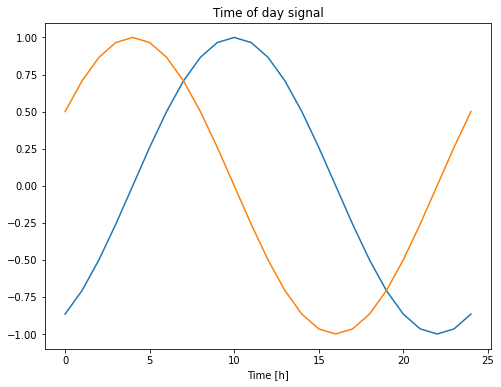

In [37]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of day signal')

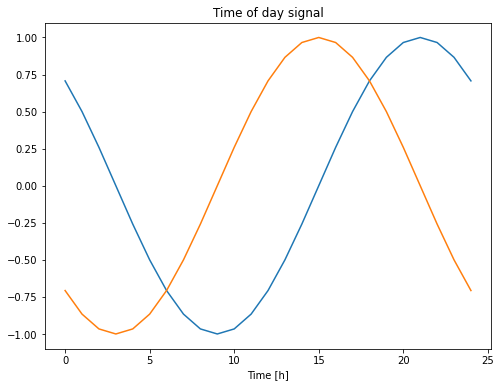

In [38]:
plt.plot(np.array(test_df['Day sin'])[:25])
plt.plot(np.array(test_df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

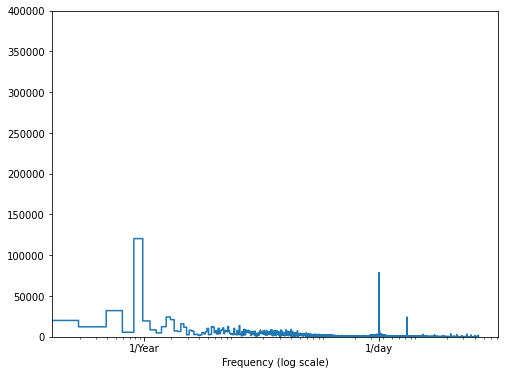

In [39]:
fft = tf.signal.rfft(df['temperature'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['temperature'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

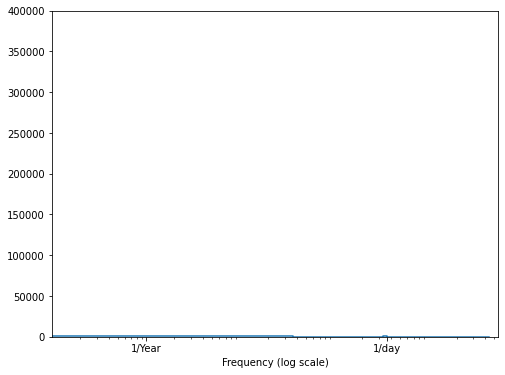

In [40]:
fft_test = tf.signal.rfft(test_df['temperature'])
f_per_dataset_test = np.arange(0, len(fft_test))

n_samples_h_test = len(test_df['temperature'])
hours_per_year = 24*365.2524
years_per_dataset_test = n_samples_h_test/(hours_per_year)

f_per_year_test = f_per_dataset_test/years_per_dataset_test
plt.step(f_per_year_test, np.abs(fft_test))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [41]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):]

num_features = df.shape[1]
num_features_test = test_df.shape

In [42]:
test1_df = pd.concat([val_df[-240:], test_df]).reset_index(drop=True)

In [43]:
test_df = test1_df

In [44]:
test_df.shape

(480, 15)

In [45]:
train_df.shape

(31508, 15)

In [46]:
val_df.shape

(13504, 15)

In [47]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [48]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

In [49]:
df_std

,Column,Normalized
0,temperature,0.266284
1,temperature,0.266003
2,temperature,0.265177
3,temperature,0.264351
4,temperature,0.263524
...,...,...
675175,Year cos,0.971474
675176,Year cos,0.972149
675177,Year cos,0.972822
675178,Year cos,0.973496


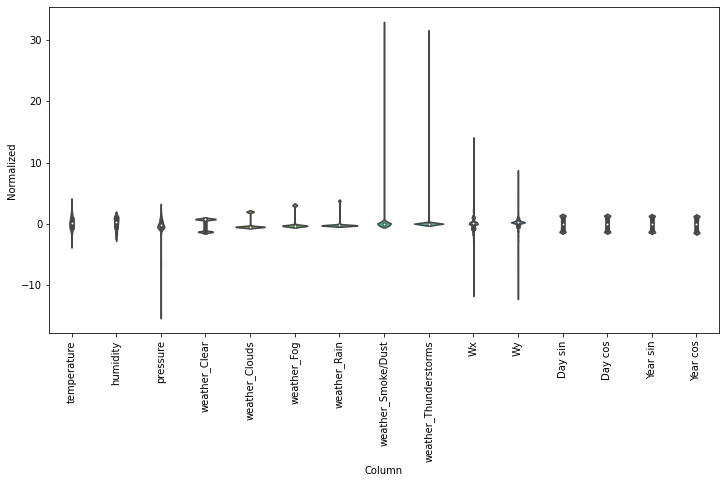

In [50]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Data windowing

### 1. Indexes and offsets

In [51]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [52]:
# w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
#                      label_columns=['temperature'])
# w1

In [53]:
w2 = WindowGenerator(input_width=216, label_width=1, shift=24,
                     label_columns=['temperature'])
w2

Total window size: 240
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
Label indices: [239]
Label column name(s): ['temperature']

### 2. Split

In [54]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [55]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 240, 15)
Inputs shape: (3, 216, 15)
labels shape: (3, 1, 1)


### 3. Plot

In [56]:
w2.example = example_inputs, example_labels

In [57]:
def plot(self, model=None, plot_col='temperature', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
            
        if label_col_index is None:
            continue
            
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)
            
        if n == 0:
            plt.legend()
    
    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

This plot aligns inputs, labels, and (later) predictions based on the time that the item refers to:

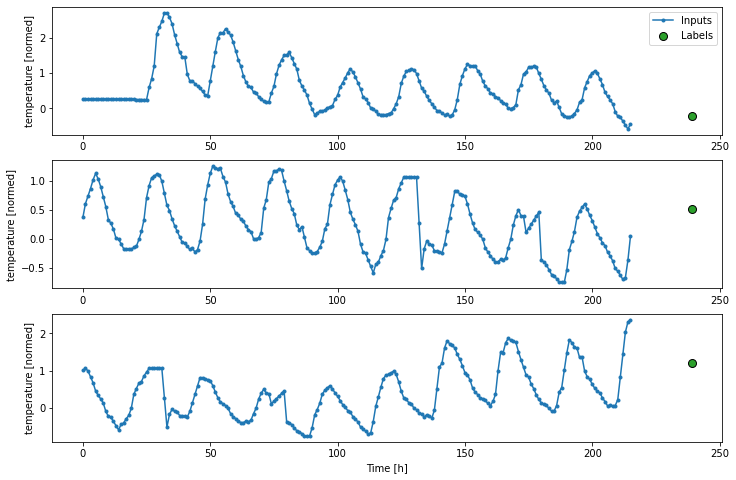

In [58]:
w2.plot()

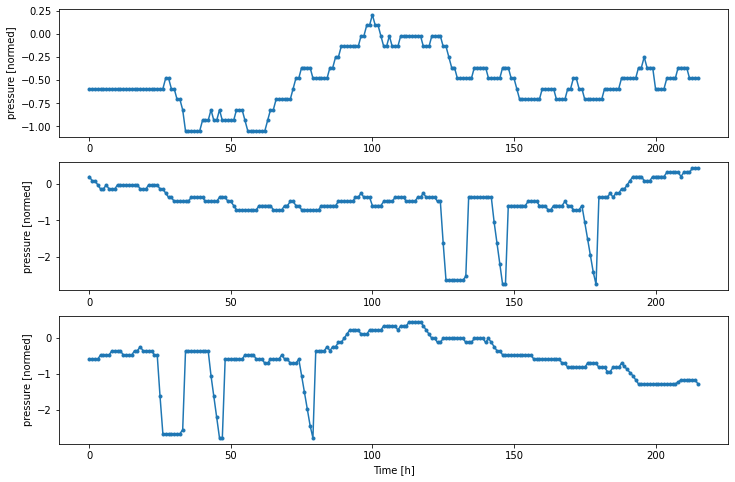

In [59]:
w2.plot(plot_col='pressure')

### 4. Create `tf.data.Dataset`s

In [60]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    
    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [61]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [62]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 216, 15), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [63]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 216, 15)
Labels shape (batch, time, features): (32, 1, 1)


## Multi-step models

Total window size: 240
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
Label indices: [216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 2

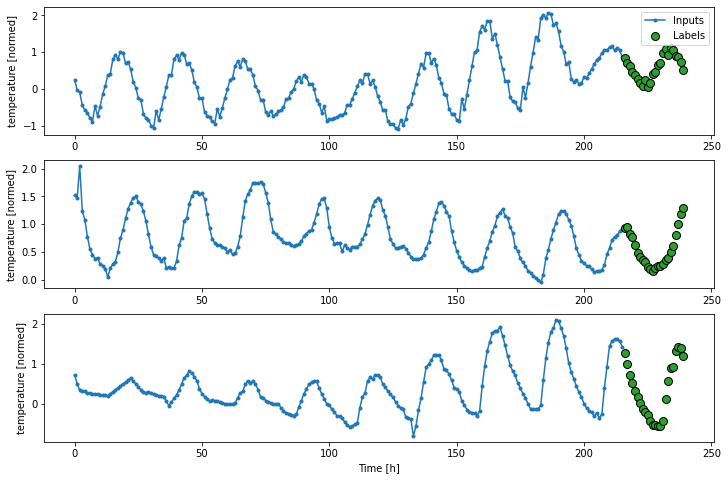

In [64]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=216,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                              label_columns=['temperature'])

multi_window.plot()
multi_window

### Baselines

8/8 [==============================] - 0s 2ms/step - loss: 2.1897 - mean_absolute_error: 1.0049


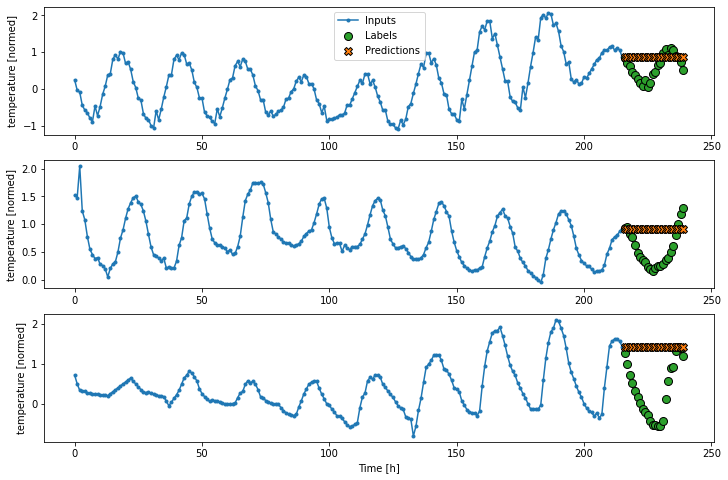

In [65]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=1)
multi_window.plot(last_baseline)

In [66]:
# class RepeatBaseline(tf.keras.Model):
#   def call(self, inputs):
#     return inputs

# repeat_baseline = RepeatBaseline()
# repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
#                         metrics=[tf.metrics.MeanAbsoluteError()])

# multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
# multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
# multi_window.plot(repeat_baseline)

### Single-shot models

#### Linear

In [67]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

415/415 [==============================] - 1s 3ms/step - loss: 0.1920 - mean_absolute_error: 0.3265


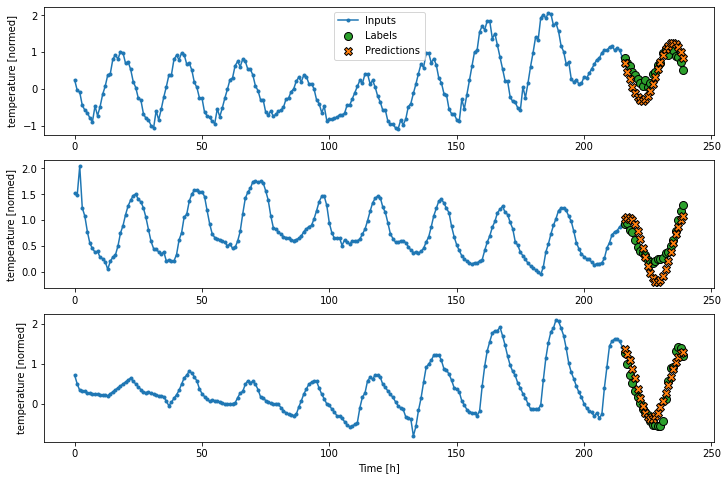

In [68]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### Dense

415/415 [==============================] - 1s 3ms/step - loss: 0.1561 - mean_absolute_error: 0.2809


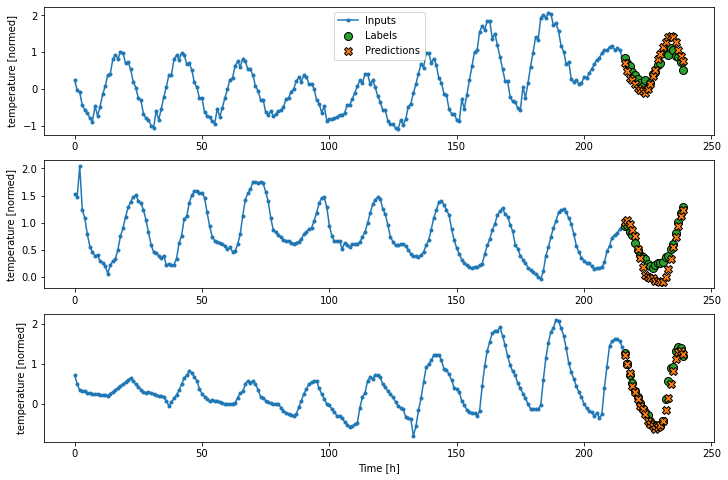

In [69]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### CNN

415/415 [==============================] - 2s 4ms/step - loss: 0.1509 - mean_absolute_error: 0.2788


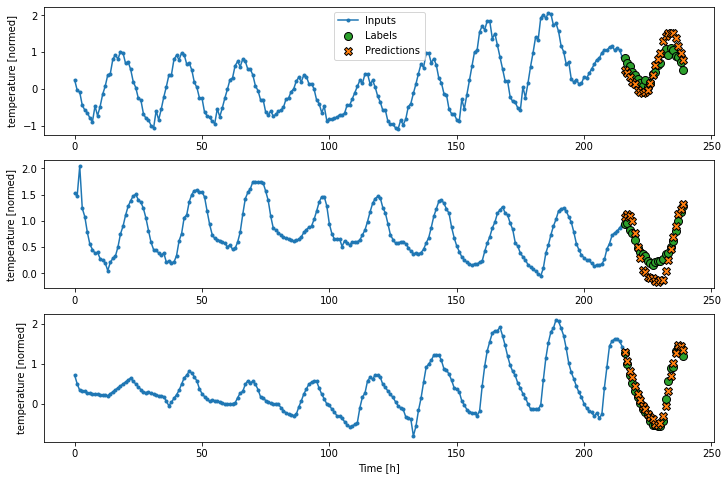

In [70]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### RNN

415/415 [==============================] - 6s 14ms/step - loss: 0.1679 - mean_absolute_error: 0.2834


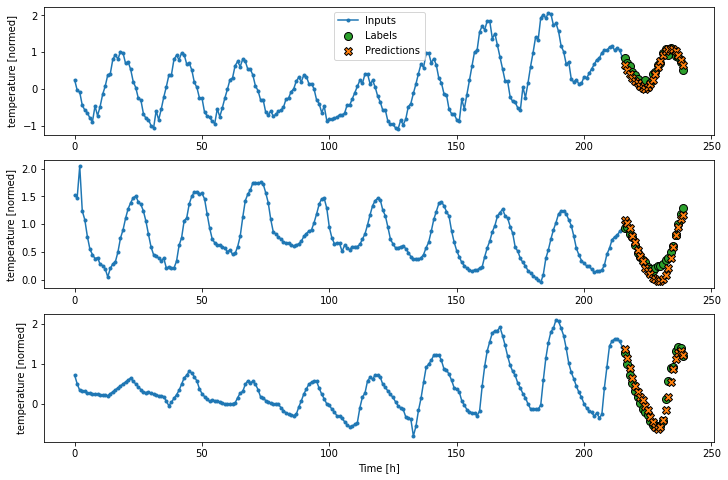

In [71]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### Advanced: Autoregressive model

#### RNN

In [72]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [73]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [74]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [75]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 15])

In [76]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [77]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 15)


415/415 [==============================] - 7s 17ms/step - loss: 0.1708 - mean_absolute_error: 0.2850


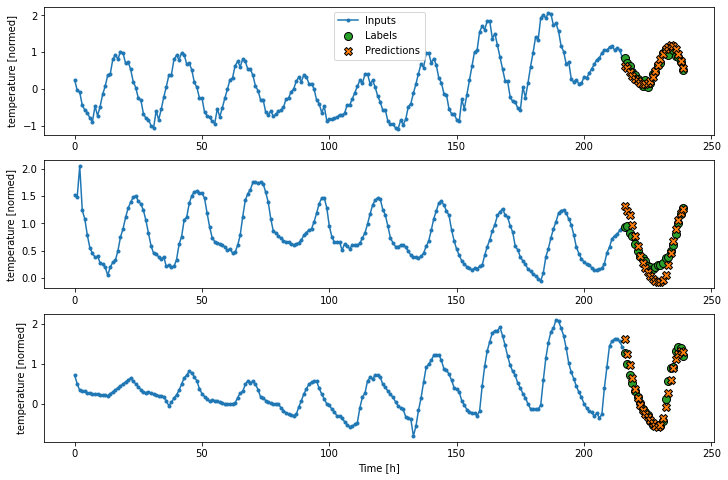

In [78]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### Performance

In [79]:
multi_val_performance

{'Last': [3.736692428588867, 1.2402223348617554],
 'Linear': [0.1920071840286255, 0.32650911808013916],
 'Dense': [0.1560886651277542, 0.2808702290058136],
 'Conv': [0.15093402564525604, 0.27879443764686584],
 'LSTM': [0.16785472631454468, 0.2833707332611084],
 'AR LSTM': [0.17079517245292664, 0.2850203812122345]}

In [80]:
multi_performance

{'Last': [2.1897435188293457, 1.0049214363098145],
 'Linear': [0.3195393681526184, 0.4497407078742981],
 'Dense': [0.1918264478445053, 0.33173272013664246],
 'Conv': [0.16834229230880737, 0.3138333261013031],
 'LSTM': [0.18282443284988403, 0.33668041229248047],
 'AR LSTM': [0.13995017111301422, 0.2997201979160309]}

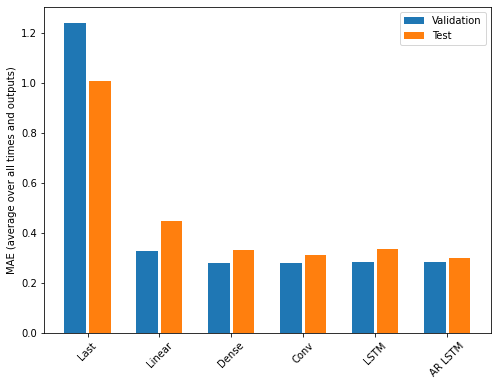

In [81]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = multi_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [82]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 1.0049
Linear  : 0.4497
Dense   : 0.3317
Conv    : 0.3138
LSTM    : 0.3367
AR LSTM : 0.2997


The gains achieved going from a dense model to convolutional and recurrent models are only a few percent (if any), and the autoregressive model performed clearly worse. So these more complex approaches may not be worth while on **this** problem, but there was no way to know without trying, and these models could be helpful for **your** problem.